# Assement Task 2 - Data analysis project

Identifiying and defining

### Researching and planning 


Project expected timeline
Choose an API and dataset to use 9/07/24
Basic functioning prototype 1/08/24
Infomation/Documentation done - 12/08/2024



Data dictionary 

| Field    | Datatype | Format for display    | Description                                        | Example      | Validation       |
|----------|----------|-----------------------|----------------------------------------------------|--------------|------------------|
|Coin Name | Object   |#######################| The name of the Crypto coin/currency               |Bitcoin| String  |
|Coin Vaule| Float64  | ####.#######          |The price of the Coin                               |1.234              |Float             |
|Date      |Datetime64|YYYY/MM/DD ##:##:##.###|The time when the coins value is updated |2024-08-01 01:33:00.310|Must be in date format of YYYY/MM/DD and the time in the format is 24 hour time:min time:seconds and milliseconds with accuracy to 1/1000 of a second.|

&nbsp; 
> **_NOTE:_** 
 The Table wraps and is laid out weird becuase of the amount of content when viewing the source code.

Today, I'm working on beginning my project.  9/07/24
I looked through the weather API and tested it out. I did have to troubleshoot an issue but in the end it worked! I now have decided to move on and 

In [2]:
import openmeteo_requests
# Turn off WINDOWS REALTIME PROTECTION! Even with admin it didn't work but realtime protection on windows defneder for some reason stopped it from working. 
import requests_cache
import pandas as pd
from retry_requests import retry


# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)

retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)

openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": -33.4267,
	"longitude": 151.3417,
	"hourly": "temperature_2m"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

OperationalError: unable to open database file

Today, I'm working on beginning my project.  9/07/24
I looked through the API and tested it out.


I ended up trying to decide between NASA DATA https://api.nasa.gov/  and Cyroptcurrency data https://docs.coingecko.com/v3.0.1/reference/introduction#. In the end I decided to choose cryptocurrency as I found it more intreasting and I had questions which I wanted this data anaylisis project to answer.
I start off with a basic piece of code which is a text based before building to a 

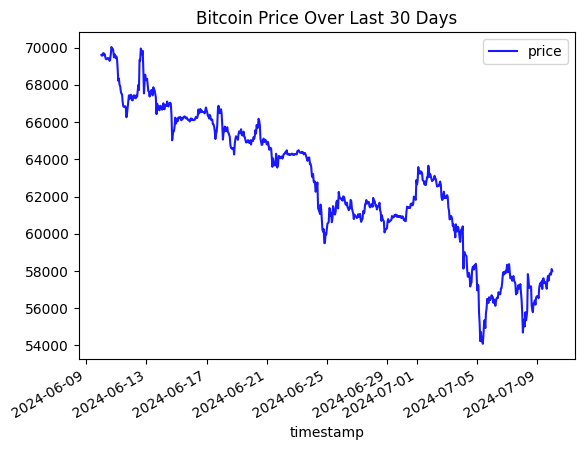

()

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the API url and follow cyrpto gecko's outline of everything in their documentation using requests.
base_url = 'https://api.coingecko.com/api/v3/coins'
coin_id = input("Chose a Cryptocurrency out of the following- Bitcoin:").lower()
endpoint = f'{base_url}/{coin_id}/market_chart'
params = {
    'vs_currency': 'usd',
    'days': '30'
}

# Fetch data and prices
response = requests.get(endpoint, params=params)
data = response.json()
prices = data['prices']

# Convert to a Data frame
df = pd.DataFrame(prices, columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Plot data
df.plot(
    kind='line',
    x='timestamp',
    y='price',
    color='blue',
    alpha=0.9,
    title='Bitcoin Price Over Last 30 Days'
)

plt.show()
()

I next begin to devlop the GUI
I again had issues with Windows real time protection messing with python so I made a bypass to tell it to ignore python 3.11.5 

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
#from flask import Flask, render_template, request
#app = Flask(__name__)
base_url = 'https://api.coingecko.com/api/v3/coins'
coin_id = input("Chose a Cryptocurrency out of the following- Bitcoin :").lower()
endpoint = f'{base_url}/{coin_id}/market_chart'
params = {
    'vs_currency': 'usd',
    'days': '30'
}
# You can see here that the API coin fetching 
"""def get_coins():
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    params = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': 20,
        'page': 1,
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        return None
    return response.json()
"""    
# Fetch data and price data
response = requests.get(endpoint, params=params)
data = response.json()
prices = data['prices']

# Convert to a DataFrame
df = pd.DataFrame(prices, columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Plot data
df.plot(
    kind='line',
    x='timestamp',
    y='price',
    color='blue',
    alpha=0.9,
    title='Bitcoin Price Over Last 30 Days'
)
# As the html isn't devloped I just needed to check it workd
plt.show()
()
# Below is commented out to remove errors
#if __name__ == '__main__':
#    app.run(debug=True)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

Unfortuntaly the crypto website is blocked however i'm going to set it up to save the data in a save file log and have it acess it when the main doesn't work (becuase the DET blocks the website so the Api fails) and this would not only give it offline capabilities but also it will tell on website.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from flask import Flask, render_template, request, redirect, url_for
from datetime import datetime
import pytz
#All imports (yes there is a lot, but they all play a role )
#Variable setting
app = Flask(__name__)

def get_coins():
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    params = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': 20,
        'page': 1,
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        return None
    return response.json()

@app.route('/')
def home():
    items = get_coins()
    return render_template('index.html', items=items)

@app.route('/plot', methods=['POST'])
def plot():
    current_time = datetime.now(pytz.timezone('Australia/Sydney'))
    time_data=(f"{current_time.time()}_{current_time.date()}")
    csv_save_data=""
    for char in time_data: # I forgot that character replace does this in two lines but Max told me later on. Ended up removing the timezone anyway as I was overcomplicationg it.
        if char == ":":
            csv_save_data += "_"
        else:
            csv_save_data += char

    # Retrieve selected coins and number of days from the html form
    selected_coins = request.form.getlist('coins')
    days = request.form.get('days', '30')  #  The form puts 30 days as a default if you dont answer that on the html page

    if not selected_coins:
        return redirect(url_for('home'))

    coin_id = selected_coins[0]  # Only is grabbing the first selected (updaye and fix)
    endpoint = f'https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart'
    params = {
        'vs_currency': 'usd',
        'days': days
    }




    response = requests.get(endpoint, params=params)
    if response.status_code != 200:
        return "Error fetching data from CoinGecko", 500
        

    data = response.json()
    if 'prices' not in data:
        return "Invalid data format received from CoinGecko", 500

    # Extract price data
    prices = data['prices']

    # Convert to DataFrame
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.to_csv('data-saves/'+csv_save_data + '.csv', mode='a', header=False, index=False)


    # Plot data
    plt.figure(figsize=(10, 5))
    df.plot(
        kind='line',
        x='timestamp',
        y='price',
        color='blue',
        alpha=0.9,
        title=f'{coin_id.capitalize()} Price Over Last {days} Days'
    )

    # Save picture of plot
    plot_path = 'static/data.jpg'
    plt.savefig(plot_path)
    plt.close()

    return render_template('result.html', coin_id=coin_id, days=days, plot_path=plot_path, items=get_coins())

if __name__ == '__main__':
    app.run(debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\Users\Riley\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Crypto Dashboard</title>
  <!-- The below is some css styling that i found in a stack overflow post to make my thing function  -->
    <style>
        .dropdown {
            position: relative;
            display: inline-block;
        }

        .dropdown-content {
            display: none;
            position: absolute;
            background-color: #f9f9f9;
            min-width: 160px;
            box-shadow: 0px 8px 16px 0px rgba(0,0,0,0.2);
            z-index: 1;
        }

        .dropdown-content label {
            display: block;
            margin-top: 10px;
        }

        .dropdown:hover .dropdown-content {
            display: block;
        }
    </style>
</head>
<body>

<h1>Crypto Dashboard</h1>


<form action="/plot" method="post">
<!--This difficult piece of code took a while and i had to watch a few tutorials on flask and html to make this work where it can display the diffrent coins-->
    <div class="dropdown">
      <button type="button">Choose a cryptocurrency:</button>
      <div class="dropdown-content">
        {% for item in items %}
          <label>
            <input type="checkbox" name="coins" value="{{ item.id }}"> {{ item.name }} ({{ item.symbol.upper() }})
          </label>
        {% endfor %}
      </div>
    </div>

    <label for="days">Number of Days:</label>
    <input type="text" id="days" name="days" required>

    <button type="submit">Update Chart</button>
</form>

</body>
</html>


In [ ]:
<!DOCTYPE html>
<html lang="en">
<!--This is a simple file that just displays an image and links back to the main page, this probably won't change at all-->
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Crypto Data Result</title>
</head>
<body>
    <img src="{{ url_for('static', filename='data.jpg') }}" alt="Crypto data Plot">
    <br>
    <a href="/">Go Back</a>
</body>
</html>

Here I begin to update the code and add a new template of infomation about the cryptocurrency

In [ ]:
#Imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
from flask import Flask, render_template, request, redirect, url_for
from datetime import datetime
import pytz
# All imports (yes there is a lot, but they all play a role )
# Variable setting and Flask initialisasation
# Draw the Api key - TO DO 

app = Flask(__name__)
#function defining
def get_coins(currency):
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    params = {
        'vs_currency': currency,
        'order': 'market_cap_desc',
        'per_page': 20,
        'page': 1,
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        return "Error fetching data from CoinGecko", 500
        #Work out some code that will drag the data from the CSV files
    return response.json()

#flask routing (yes its janky and unoptimsed leave me alone)
@app.route('/')
def home():
    items = get_coins("USD")
    return render_template('index.html', items=items)

@app.route('/info')
def info():
    return render_template('info.html')

@app.route('/plot', methods=['POST'])
def plot():
    current_time = datetime.now(pytz.timezone('Australia/Sydney'))
    time_data=(f"{current_time.time()}_{current_time.date()}")
    csv_save_data= time_data.replace(":","_")
    # Retrieve selected coins and number of days from the form
    selected_coins = request.form.getlist('coins')
    days = request.form.get('days', '30')
    currency = "USD"
    #currency = request.form.get()
    # Default to 30 days if no value is provided
    # Redirecter in case you try to glitch the application 
    if not selected_coins:
        return redirect(url_for('home'))
    # remove me below! this is a debugging statement so i can see it works and prints coins - so it recieves data but i now need to resturcture 
    for selected_coin in selected_coins:
        print(selected_coin)

    if 'prices' not in get_coins(currency):
        return "Invalid data format received from CoinGecko", 500

    # Extract price data
    prices = get_coins(currency)['prices']

    # Convert to DataFrame
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.to_csv('data-saves/'+csv_save_data + '.csv', header=None, index=False, names=['Coin name','Timestamp', 'Coin Vaule', ])

    coin_id = ""
    for coin in selected_coins:
        coin_id+= f"{coin}'s +"
        if coin_id != "" or selected_coin =="":
            coid_id+= "+"

    # Plot data
    plt.figure(figsize=(10, 5))
    df.plot(
        kind='line',
        x='timestamp',
        y='price',
        color='blue',
        alpha=0.9,
        title=f'{coin_id.capitalize()} Price Over Last {days} Days'
    )
    # You know funnily this pulls an error and it says its unlikely to work (becuase its outside the main loop (not really but matplotlib thinks that)) but it hasnt failed yet soooooo?
    # Saves plot to a file in static (flask checks here )
    plot_path = 'static/data.jpg'
    plt.savefig(plot_path)
    plt.close()
    return render_template('result.html', coin_id=coin_id, days=days, plot_path=plot_path, items=get_coins())
#Main Loop 
if __name__ == '__main__':
    app.run(debug=True)


#To do 
#CSV
#Info page

In [ ]:
# Imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
from flask import Flask, render_template, request, redirect, url_for
from datetime import datetime
import os
import random

# Variable setting and Flask initialization
#Probs need to do an API key that reads from an .env file (wont commit cause of a gitignore bypass)
app = Flask(__name__)

# Function defining
def get_coins(currency):
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    params = {
        'vs_currency': currency,
        'order': 'market_cap_desc',
        'per_page': 20,
        'page': 1,
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        return response.json()
    except requests.RequestException:
        # Fallback to reading from a csv file if the API request fails
        if os.path.exists('data-saves/backup_data.csv'):
            df = pd.read_csv('data-saves/backup_data.csv')
            # another weird line that may work but it gives back the data organised in a particaulr way so that the program doesn't have to remove heaps
            return df.to_dict(orient='records')
        print("Error fetching data from CoinGecko and no backup data available", 500)

# Flask routing
@app.route('/')
def home():
    items = get_coins("USD")
    return render_template('index.html', items=items)

@app.route('/info')
def info():
    return render_template('info.html')

@app.route('/plot', methods=['POST'])
def plot():
    # Retrieve selected coins and number of days from the form
    selected_coins = request.form.getlist('coins')
    days = request.form.get('days', '30')
    currency = "USD"
    # currency = request.form.get() maybe add this
    # Default to 30 days if no value is provided
    # Redirecter in case you try to glitch the application (type in a link)
    if not selected_coins:
        return redirect(url_for('home'))

    if 'prices' not in get_coins(currency):
        return "Invalid data format received from CoinGecko", 500

    prices = get_coins(currency)['prices']

    #Convert to DataFrame for Pandas
    df = pd.DataFrame(prices, columns=['Timestamp', 'Price'])
    df.to_csv("data-saves/backup_data.csv")

    coin_id = ""
    for coin in selected_coins:
        coin_id+= f"{coin}'s +"
        if coin_id != "" or selected_coins =="":
            coid_id+= "+"

    # This plots the data displayed to a plot in the background (doesn't show)
    plt.figure(figsize=(10, 5))
    df.plot(
        kind='line',
        x='timestamp',
        y='price',
        color='blue',
        alpha=0.9,
        # This is needing a change (thought I changed this but apparently not) 
        title=f'{coin_id.capitalize()} Price Over Last {days} Days'
    )
    # You know funnily this pulls an error and it says its unlikely to work (becuase its outside the main loop (not really but matplotlib thinks that)) but it hasnt failed yet soooooo?
    # Saves plot to a file in static (flask checks here )
    plot_path = 'static/data.jpg'
    plt.savefig(plot_path)
    plt.close()
    return render_template('result.html', coin_id=coin_id, days=days, plot_path=plot_path, items=get_coins())
#Main Loop
# Because my code is laid in variables and the Flask routing the actual main loop is two lines and my code is super readable
if __name__ == '__main__':
    app.run(debug=True)


See commit history for a continued breakdown to the final result, as I was informed that wew

To do 
- Info page
- Csv saves propely and has the corerect headings
- Proper Offline working (test at school)